In [4]:
import asyncio
from pyppeteer import launch
from PIL import Image
import io

In [2]:
async def main():
    browser = await launch()
    page = await browser.newPage()
    await page.goto('https://example.com')
    await page.screenshot({'path': 'example.png'})
    await browser.close()

asyncio.get_event_loop().run_until_complete(main())

RuntimeError: This event loop is already running

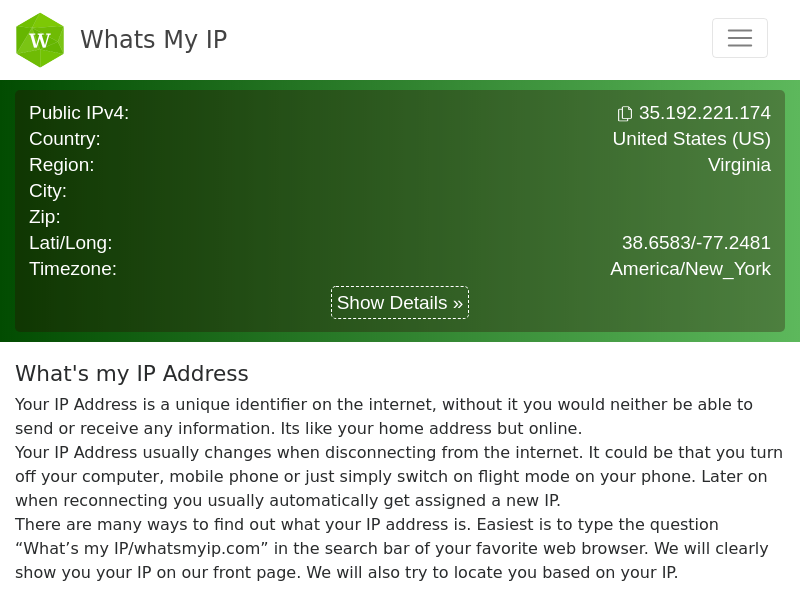

In [3]:
browser = await launch()
page = await browser.newPage()
await page.goto('https://whatsmyip.com')
await page.screenshot({'path': 'example.png'})
await browser.close()
display(Image.open('example.png'))

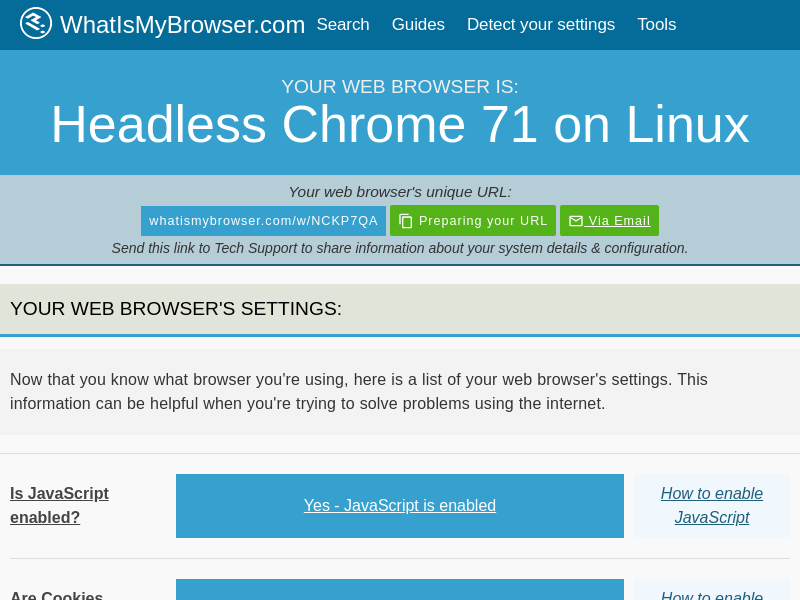

In [2]:
browser = await launch()
page = await browser.newPage()
await page.goto('https://whatismybrowser.com')
await page.screenshot({'path': 'example.png'})
await browser.close()
display(Image.open('example.png'))

request: document https://www.interasia.cc/content/c_service/cargo_tracking.aspx?SiteID=1
request: stylesheet https://www.interasia.cc/css/en/reset.css
request: stylesheet https://www.interasia.cc/css/en/layout.css
request: stylesheet https://www.interasia.cc/css/en/page.css
request: stylesheet https://www.interasia.cc/css/en/editable_content.css
request: stylesheet https://www.interasia.cc/css/en/colorbox.css
request: script https://www.interasia.cc/js/jquery-latest.min.js
request: script https://www.interasia.cc/js/jquery.js
request: script https://www.interasia.cc/WebResource.axd?d=kYOY4iKkMeiGmZhy3hEefq0S5EZ_O3Z9zqHgtYaki7VRLPPnqNMoFbSZKZXkGfDNDzELRzb4_Zq0csdTOOS11N_DQD01&t=637291086790368644
request: image https://www.interasia.cc/images/en/pic/menu01.jpg
request: image https://www.interasia.cc/images/en/pic/menu02.jpg
request: image https://www.interasia.cc/images/en/pic/menu03.jpg
request: image https://www.interasia.cc/images/en/pic/menu04.jpg
request: image https://www.interas

request: script https://www.google-analytics.com/analytics.js
request: image https://www.interasia.cc/images/en/bg/menuArea.png
request: image https://www.interasia.cc/images/en/btn/btn_search.jpg
request: image https://www.interasia.cc/images/en/logo.png
request: image https://www.interasia.cc/images/en/btn/btn_index_1.png
request: image https://www.interasia.cc/images/en/icon_randomcode.png
request: image https://www.interasia.cc/images/en/icon_social_network.png
request: image https://www.interasia.cc/images/en/icon_font_size.png
request: image https://www.interasia.cc/images/en/icon_toolbar.png
request: image https://www.interasia.cc/images/en/icon/page-dds_chk.png
request: image https://www.interasia.cc/images/en/icon/page-cargotracking.png
request: image https://www.interasia.cc/images/en/icon/page-telexrelease.png
request: image https://www.interasia.cc/images/en/icon/page-shippingschedule.png
request: image https://www.interasia.cc/images/en/icon/page-skd.png
request: image htt

request: document https://www.interasia.cc/WebTools/RandomCode.ashx?Code=
response: document https://www.interasia.cc/WebTools/RandomCode.ashx?Code=


request: document https://www.interasia.cc/WebTools/RandomCode.ashx?Code=
response: document https://www.interasia.cc/WebTools/RandomCode.ashx?Code=


request: document https://www.interasia.cc/WebTools/RandomCode.ashx?Code=
response: document https://www.interasia.cc/WebTools/RandomCode.ashx?Code=


request: document https://www.interasia.cc/WebTools/RandomCode.ashx?Code=
response: document https://www.interasia.cc/WebTools/RandomCode.ashx?Code=


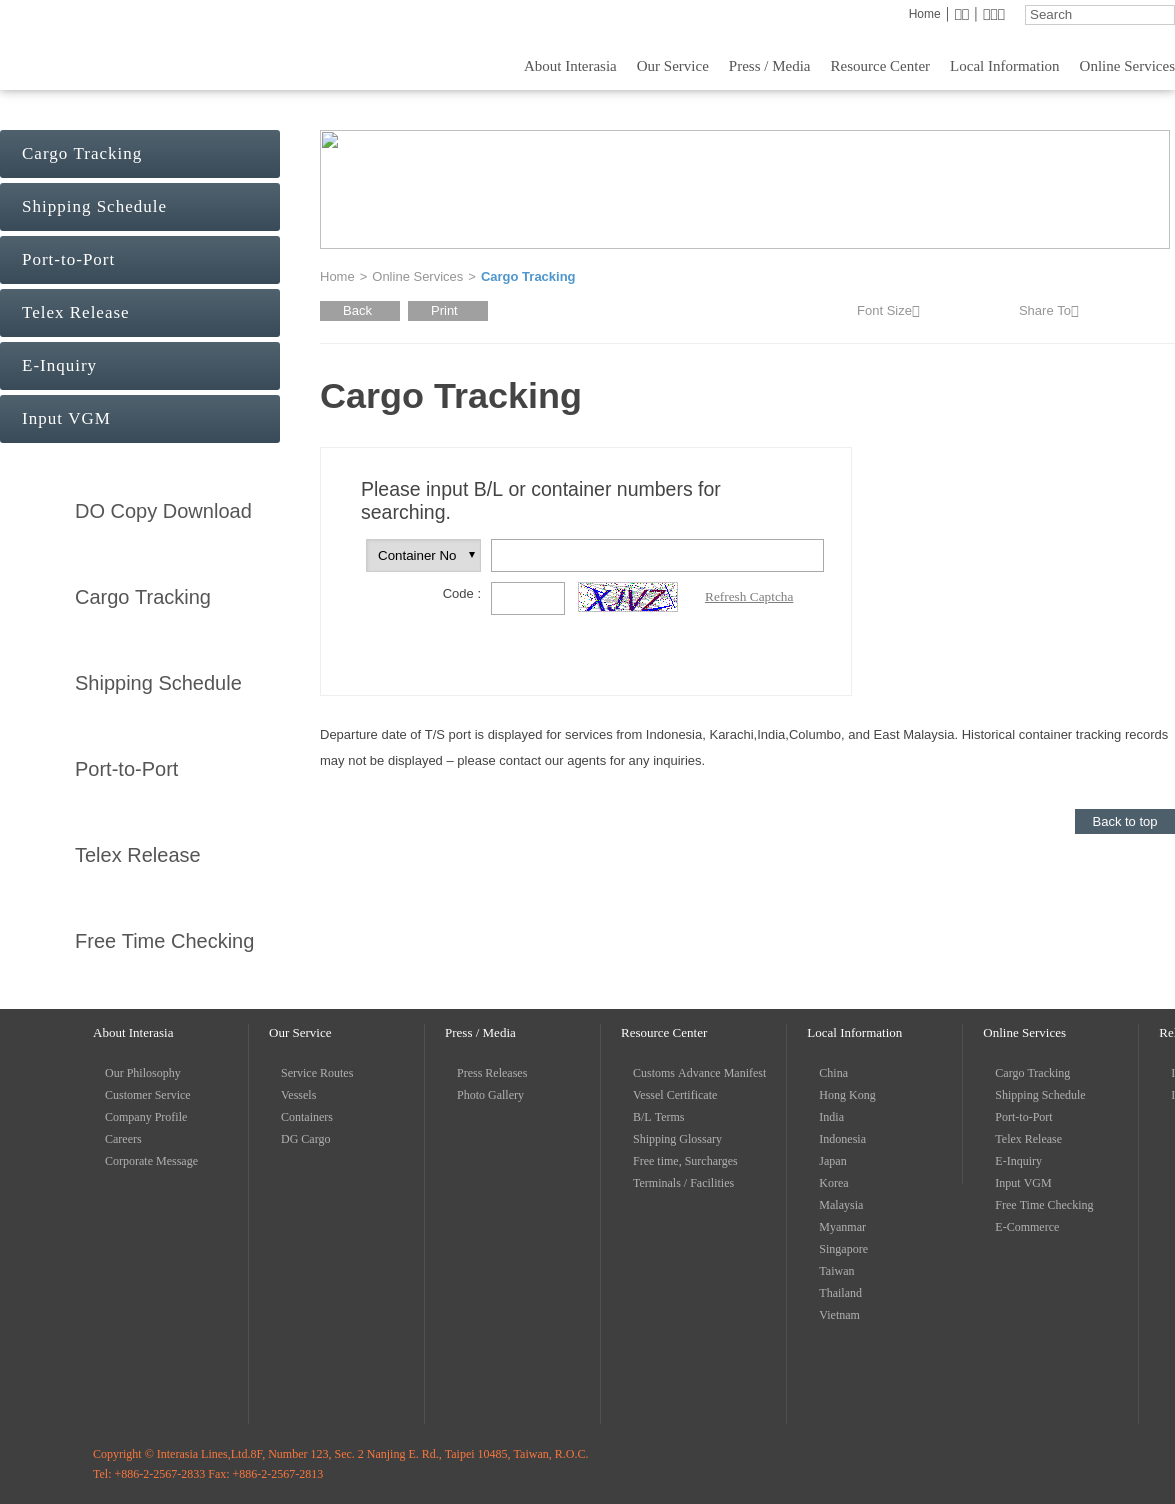

In [16]:
browser = await launch(ignoreHTTPSErrors=True)
page = await browser.newPage()

images = []

async def interceptRequest(interceptedRequest):
    print("request: " + interceptedRequest.resourceType + " " + interceptedRequest.url )
    if interceptedRequest.resourceType != 'image' :
        await interceptedRequest.continue_()
        return
    if "ashx" not in interceptedRequest.url :
        await interceptedRequest.abort()
        return
    await interceptedRequest.continue_()
page.on('request', lambda interceptedRequest: asyncio.ensure_future(interceptRequest(interceptedRequest)))
await page.setRequestInterception(True)

async def interceptResponse(interceptedResponse):
    if "ashx" not in interceptedResponse.request.url :
    #if interceptedResponse.request.resourceType != 'image':
        return
    print("response: " + interceptedResponse.request.resourceType + " " + interceptedResponse.request.url )
    print(interceptedResponse)
    image = Image.open(io.BytesIO(await interceptedResponse.buffer()))
    display(image)
    images.append(image)
page.on('response', lambda interceptedResponse: asyncio.ensure_future(interceptResponse(interceptedResponse)))

await page.goto('https://www.interasia.cc/content/c_service/cargo_tracking.aspx?SiteID=1')
await page.screenshot({'path': 'example.png', 'fullPage': 'true'})
cont = await page.content()

await page.goto('https://www.interasia.cc/WebTools/RandomCode.ashx?Code=')
await page.goto('https://www.interasia.cc/WebTools/RandomCode.ashx?Code=')
await page.goto('https://www.interasia.cc/WebTools/RandomCode.ashx?Code=')
await page.goto('https://www.interasia.cc/WebTools/RandomCode.ashx?Code=')
await page.goto('https://www.interasia.cc/WebTools/RandomCode.ashx?Code=')

await browser.close()
display(Image.open('example.png'))
#print(cont)

In [17]:
element = await page.querySelector('ctl00_CPHContent_imgCode')
print(element)
element = await page.Jx('//img[contains(id(), "ctl00_CPHContent_imgCode")]')
print(element)
title = await page.evaluate('(element) => element.textContent', element)
print(title)

NetworkError: Protocol Error (Runtime.evaluate): Session closed. Most likely the page has been closed.